In [1]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [21]:
players <- read_csv("data/players.csv")

players <- players|>
            mutate(experience = as_factor(experience),
                  gender = as_factor(gender))
players

players_means <- summarize(players, 
                            mean_age = mean(Age, na.rm = TRUE),
                            mean_hours = mean(played_hours, na.rm = TRUE))|>
                                mutate(mean_age = round(mean_age, 2), mean_hours = round(mean_hours, 2))
players_means

experience_plot <- ggplot(players, aes(x = experience, fill = experience)) + 
geom_bar() + 
labs(x = "Player Experience level", y = "Count", fill = "Player Experience level") + 
ggtitle("Counts of players experience levels")
#experience_plot load further down to discuss

gender_plot <- ggplot(players, aes(x = gender, fill = gender)) + 
geom_bar()+
theme(text = element_text(size = 10))+
labs(x = "Player Gender", y = "Count", fill = "Player Gender") + 
ggtitle("Counts of players Genders")
#gender_plot load further down to discuss
age_hours_plot <- ggplot(players, aes(x = Age, y = played_hours + 1)) + #avoid log(0)
                    geom_point()+
                    scale_y_log10()+
                    labs(x = "Age", y = ("total hours played (scaled by log10 + 1)"))+
                    ggtitle("Hours played based on age")
#age_hours_plot later

subscribed_counts <- players|>
                group_by(subscribe)|>
                    summarize(count = n())
subscribed_counts

experience_counts <- players|>
                group_by(experience)|>
                    summarize(count = n())
experience_counts
experience_prop <- players|>
            group_by(experience)|>
            summarize(prop = round(n()/nrow(players),2))
#experience_prop further down when we're looking at vizualizations
gender_counts <- players|>
            group_by(gender)|>
            summarize(count = n())
gender_counts

gender_prop <- players|>
        group_by(gender)|>
        summarize(prop = round(n()/nrow(players),2))
#gender_prop further down when we're looking at vizualizations

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


mean_age,mean_hours
<dbl>,<dbl>
21.14,5.85


subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


experience,count
<fct>,<int>
Pro,14
Veteran,48
Amateur,63
Regular,36
Beginner,35


gender,count
<fct>,<int>
Male,124
Female,37
Non-binary,15
Prefer not to say,11
Agender,2
Two-Spirited,6
Other,1


- Our dataset has 196 rows, meaning we have 196 players with data.
- experience: a class(changed to factor from character in case we need it as a class to predict), how experienced is a player in Minecraft? 5 possible values: Amateur(63), Beginner(35), Pro(14), Regular(36), Veteran(48) (using a bar chart to see possible values)
- subscribe: a boolean True (144) or False (52), whether the player is subscribed to a game-related newsletter (based on assignment criteria)
- hashedEmail: participants encrypted email, not needed
- played_hours: hours a participant played on the Minecraft server (1 decimal)
- name: participant name
- gender: participant gender (Agender, Female, Male, Non-binary, Other, Prefer not to say, Two-Spirited)
- Age: participant age
- mean_age: 21.14 years, some data removed due to missing values
- mean_hours: 5.85 hours

In [9]:
sessions <- read_csv("data/sessions.csv")
sessions_means <- summarize(sessions, 
                            mean_original_start_time = mean(original_start_time, na.rm = TRUE),
                            mean_original_end_time = mean(original_end_time, na.rm = TRUE))|>
                                mutate(mean_original_start_time = round(mean_original_start_time, 2),
                                       mean_original_end_time = round(mean_original_end_time, 2))
#sessions
sessions_means

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_original_start_time,mean_original_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


Our dataset has 1535 rows, meaning we have 1535 sessions recorded.
- hashedEmail: encoded email, not needed
- start_time: a date & time when a session was started
- end_time: a date & time when a session was finished
- original_start_time: in milliseconds, same value as start_time but in UNIX time
- original_end_time: in milliseconds, same value as end_time but in UNIX time
- Means for og start and end time aren't very helpful right now, they are almost the same value since they are so big. Later if we need to work with them we could scale them down so the differences are more prevalent

Question: can played_hours and age predict experience in players? This is a classification problem, so we'll be using k-nearest neighbors to see if we can make a model that can predict player experience based on hours played and age. I already turned experience into a factor so other than that, no wrangling is needed.

Exploratory vizualizations:

experience,prop
<fct>,<dbl>
Pro,0.07
Veteran,0.24
Amateur,0.32
Regular,0.18
Beginner,0.18


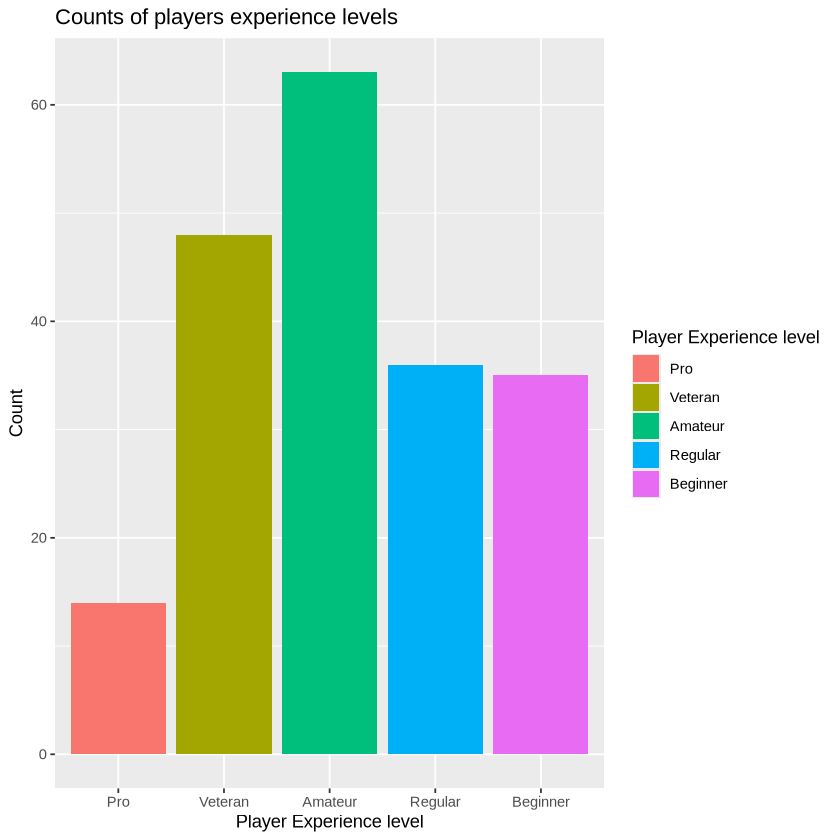

In [18]:
experience_plot
experience_prop

The experience plot shows us that most players in the study are more casual rather than competitive or veterans. Looking at the proportions, we can see about 31% of players were pro/veteran, whereas the others were more casual

gender,prop
<fct>,<dbl>
Male,0.63
Female,0.19
Non-binary,0.08
Prefer not to say,0.06
Agender,0.01
Two-Spirited,0.03
Other,0.01


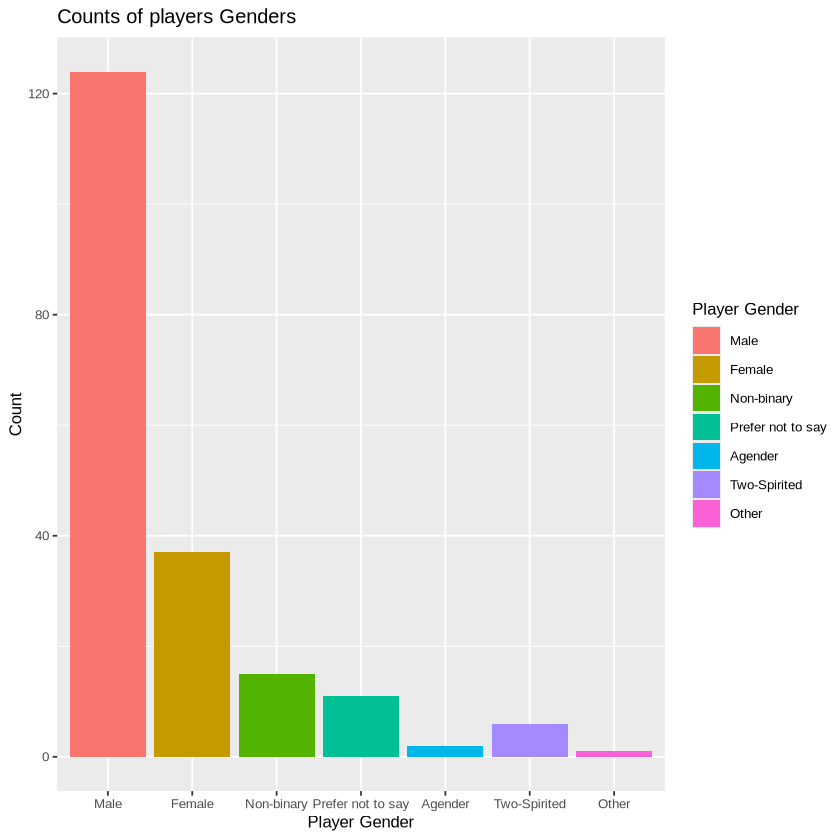

In [19]:
gender_plot
gender_prop

The gender plot shows that a majority of players are male 63%, followed by female and non-binary which are still much less prevalent (19 & 8 %).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


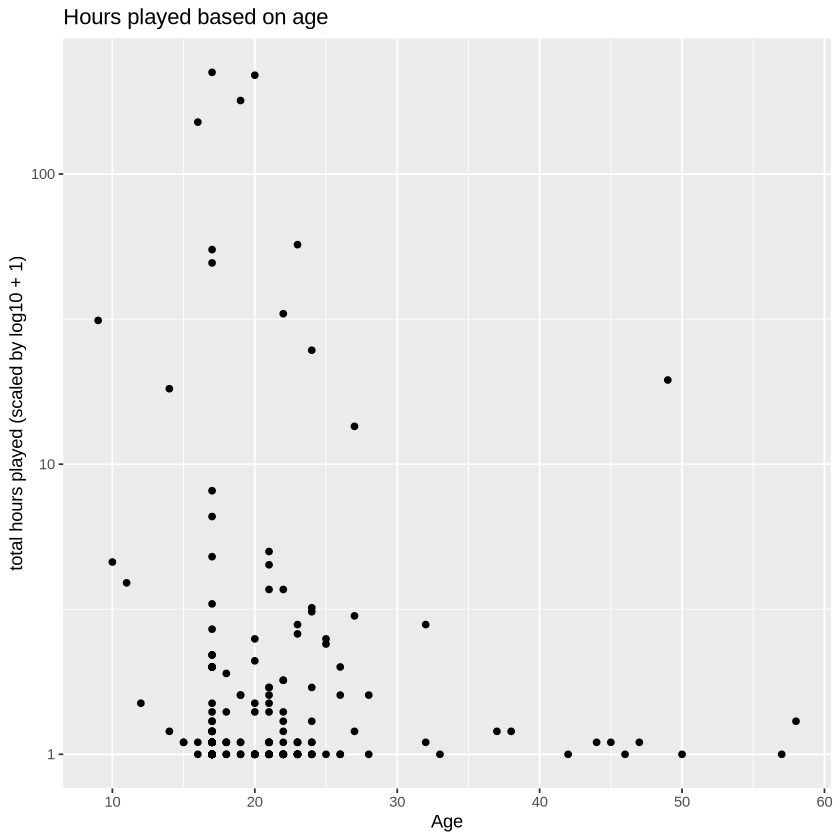

In [22]:
age_hours_plot

The age hours plot can be our first step of thinking about this data and if there's some kind of relationship. My original thought was that as age went up, hours would go down due to less time/priorities. In the graph, we don't really see that, the hours are pretty variable in the 15-25 range. It would've been interesting if we had more data from older people to better see some kind of relationship. I scaled hours_played using log10 since there were some outliers with hundreds of hours that were really stretching out the plot, and not letting us get a good look at the rest of the points. I also added the + 1 to all hours played, since without it, our y axis would exclude data with 0 hours (since log(0) is an error). Along with that, log(1) is equal to 0 so I chose 1 as the scaling to make sure we didnt get any negative y values here.

- Why is this method appropriate?
- Which assumptions are required, if any, to apply the method selected?
- What are the potential limitations or weaknesses of the method selected?
- How are you going to compare and select the model?
- How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?